## Ecuaciones Diferenciales Parciales Elípticas
#### Problema:

Aproxime la solución de la ecuación diferencial parcial elíptica:


$$\frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2} = 4, \quad 0<x<1, \quad 0<y<2;$$

$$u(x,0) = x^2, \quad u(x,2) = (x-2)^2,\quad 0 \leq x \leq 1;$$
$$u(0,y) = y^2, \quad u(1,y) = (y-1)^2,\quad 0 \leq y \leq 2;$$

Use $h=k=\frac{1}{4}$

#### Solución:

In [126]:
# librerías necesarias
import numpy as np
import copy
from archivos.latex_archivos import ltx_matriz
from IPython.display import Latex
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [130]:
# Inicialización de variables

h = 0.25 # h = k = 0.25

x0 = 0  # valor inferior de x
xf = 1  # valor superior de x
y0 = 0  # valor inferior de y
yf = 2  # valor superior de y

maxIter = 50  # Número máximo de iteraciones
error = 0.0001    # Error considerado

c = lambda x, y: 4  # Función 

# Funciones que definen la frontera
uxI = lambda x, y: x ** 2  # función inferior de x
uxS = lambda x, y: (x - 2) ** 2  # función superior de x
uyI = lambda x, y: y ** 2  # función inferior de y
uyS = lambda x, y: (y - 1) ** 2  # función superior de y

Cálculo las matrices iniciales:

In [131]:
n = int((yf - y0) / h + 1)  # número de filas de la matriz
m = int((xf - x0) / h + 1)  # número de columnas

x = np.arange(x0, xf + h, h)
y = np.arange(y0, yf + h, h)

a = np.zeros([n, m])
b = np.zeros([n, m])

# matriz exterior  
for i in range(n):
    a[i, 0] = uyI(x[0], i * h) 
    
for i in range(n):
    a[i, -1] = uyS(x[-1], i * h) 

for i in range(m):
    a[0, i] = uxI(i * h, y[0]) 
    
for i in range(m):
    a[-1, i] = uxS(i * h, y[-1]) 
    
# matriz interior      
for j in range(n-2):
	for i in range(m-2):
		b[j + 1, i + 1] = c((j + 1) * h, (i + 1) * h)
a = a[:: -1]
b = b[:: -1]
ltx_matriz(a,"Mext")
ltx_matriz(np.round(b,4),"Mint")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Iterraciones:

In [132]:
k = 0
conve = 0
while k < maxIter and conve == 0:
    k = k + 1
    t = copy.copy(a)
    for j in range(n - 2):
        for i in range(m - 2):
            a[j + 1, i + 1] = (a[j, i + 1] + a[j + 1, i] + a[j + 2, i + 1] + a[j + 1, i + 2] - b[j + 1, i + 1] * h ** 2) / 4    
    
    if (np.linalg.norm(a - t)) / (np.linalg.norm(a)) < error:
    	conve = 1
if conve == 1:
    print("El número de iteraciones es: %s" %k)
else:
    print("El sistema no converge")

ltx_matriz(np.round(a,4),"Msolución")


El número de iteraciones es: 17


<IPython.core.display.Math object>

Gráfico:

In [133]:
X, Y = np.meshgrid(x, y)
a = a[:: -1]

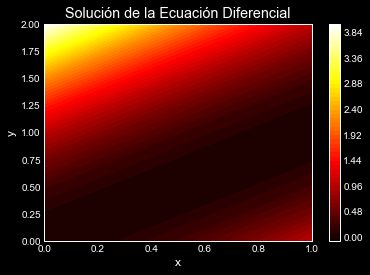

In [134]:
plt.contourf(X, Y, a, 50, cmap = 'hot')
plt.title("Solución de la Ecuación Diferencial")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()